In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
# from keras.utils import np_utils
from keras.utils import to_categorical

from keras import backend as K
# K.set_image_dim_ordering('th')

In [32]:
# !pip install keras
# !pip install tensorflow


In [70]:
seed = 1234
np.random.seed(seed)

In [71]:
(x_train,y_train), (x_test, y_test) =mnist.load_data()

In [72]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [73]:
x_train[:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

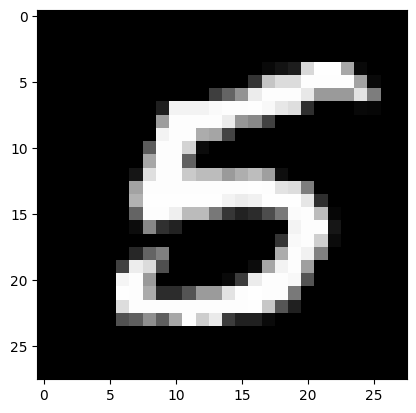

In [74]:
plt.imshow(x_train[20000], cmap =plt.get_cmap('gray'))

In [75]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype("float32")
x_test =  x_test.reshape(x_test.shape[0], 28, 28, 1).astype("float32")

In [76]:
x_train  = x_train / 255
x_test   = x_test / 255

In [77]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
n_classes = y_test.shape[1]

In [78]:
y_train.shape, y_test.shape, x_train.shape, x_test.shape

((60000, 10), (10000, 10), (60000, 28, 28, 1), (10000, 28, 28, 1))

In [79]:
#fitting model arch

def model_arc():
  model = Sequential()
  model.add(Conv2D(30,(4,4), input_shape = (28,28, 1), activation = "relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(10, (2,2), activation = "relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))
  model.add(Flatten())
  model.add(Dense(128, activation = "relu"))
  model.add(Dense(20, activation = "relu"))
  model.add(Dense(n_classes, activation = "softmax"))
  model.compile(optimizer = "adam", metrics = ["accuracy"], loss = "categorical_crossentropy")
  return model

In [80]:
model =  model_arc()
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 3, batch_size=200, verbose =2)
accuracy_scale = model.evaluate(x_test, y_test, verbose = 0)


Epoch 1/3
300/300 - 30s - loss: 0.6117 - accuracy: 0.8100 - val_loss: 0.1286 - val_accuracy: 0.9634 - 30s/epoch - 99ms/step
Epoch 2/3
300/300 - 27s - loss: 0.1682 - accuracy: 0.9487 - val_loss: 0.0754 - val_accuracy: 0.9764 - 27s/epoch - 90ms/step
Epoch 3/3
300/300 - 29s - loss: 0.1241 - accuracy: 0.9614 - val_loss: 0.0574 - val_accuracy: 0.9809 - 29s/epoch - 96ms/step
